In [7]:
# hidden
import environment as env
env.initialize()

### Distribución de extremos de la variable predominante: Serie temporal de eventos extremos

Este ejemplo continuará a partir de los datos temporales guardados al final del apartado [Transformacion de los estados de las variables oceanograficas al emplazamiento](cl_transformacion_emplazamiento_01.ipynb). Se utiliza la serie temporal de altura de ola significante $H_s$. Se obtienen todos los eventos de extremos utilizando una ventana temporal móvil de longitud $N_i$ días para garantizar su independencia. La longitud de dicha ventana es definida por el usuario.

Las funciones que se utilizan son:

- clima_maritimo.clima_maritimo.fdist.utils.picos_dur
- clima_maritimo.graficas.plot_extremal.plot_serie_picos

In [8]:
# imports Anaconda
from __future__ import division
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imports ROM 1.1
from clima_maritimo.clima_maritimo.fdist import utils
from clima_maritimo.graficas import plot_extremal

dir_data = os.path.join(env.data_path, 'clima')
df = pd.read_pickle(os.path.join(dir_data, 'cadiz_hs_sim_emp.pkl'))        

Entradas de usuario:

- Número de dias para garantizar que eventos independientes $N_i$

In [9]:
Ni = 5

NOTA:
La duración de la ventana se hace según el número de datos que corresponden a $N_i$ dias por lo que es necesario que la serie tenga una cadencia homogénea. En caso contrario, se eligirá la más representativa.

In [10]:
df['td'] = df.index.to_series() - df.index.to_series().shift()
cadencias = df['td'].value_counts()
cadencias = cadencias[cadencias > 0.01 * len(df)]

if len(cadencias)>1:
    print('La serie temporal no es homogénea. Presenta las siguientes cadencias:')
    str_4 = ''
    for j, cad in enumerate(cadencias):
        str_4 += str(cad) + ' datos con una cadencia de ' + str(cadencias.index[j]) + '\n'
    print(str_4)
    print('Para el cálculo se utilizará la cadencia de ' + str(cadencias.argmax()))
    cad_df = cadencias.argmax().total_seconds()
else:
    print('Para el cálculo se utilizará la cadencia de ' + str(cadencias.index[0]))
    cad_df = cadencias.index[0].total_seconds()

df.drop('td', axis=1, inplace=True)
no_datos_dia = (24 * 3600) / cad_df
dur_picos = Ni * int(no_datos_dia)
nanios = len(np.unique(df.index.year))

Para el cálculo se utilizará la cadencia de 0 days 03:00:00


Utilizando la funcion $picos\_dur$ se obtienen todos los eventos de extremos presentes en la serie temporal. Se guarda el dataframe de picos.

In [11]:
pos_picos = utils.picos_dur(df, dur_picos)
df_picos = df.iloc[pos_picos, :]
df_picos.to_pickle(os.path.join(dir_data, 'cadiz_hs_sim_picos.pkl'))

Se visualizan los resultados utilizando la función $plot\_serie\_picos$:

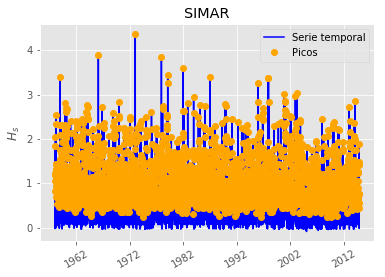

In [12]:
plot_extremal.plot_serie_picos(df, df_picos, '$H_s$', 'SIMAR')
plt.show()

Continuar con [Distribución de extremos de la variable predominante: Serie temporal de picos sobre umbral (POT)](cl_regimen_extremal_03.ipynb).